In [1]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

In [2]:
ticker = "TSLA"

In [3]:
history = yf.Ticker(ticker).history(period="3mo")

In [4]:
print(f"3 months low: {history.Low.min().astype(int)}")
print(f"3 months high: {history.High.max().astype(int)}")

3 months low: 101
3 months high: 203


In [5]:
history.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-02 00:00:00-05:00,187.330002,196.750000,182.610001,188.270004,217448300,0,0
2023-02-03 00:00:00-05:00,183.949997,199.000000,183.690002,189.979996,231684200,0,0
2023-02-06 00:00:00-05:00,193.009995,198.169998,189.919998,194.759995,186188100,0,0
2023-02-07 00:00:00-05:00,196.429993,197.500000,189.550003,196.809998,186010300,0,0
2023-02-08 00:00:00-05:00,196.100006,203.000000,194.309998,201.289993,180154500,0,0


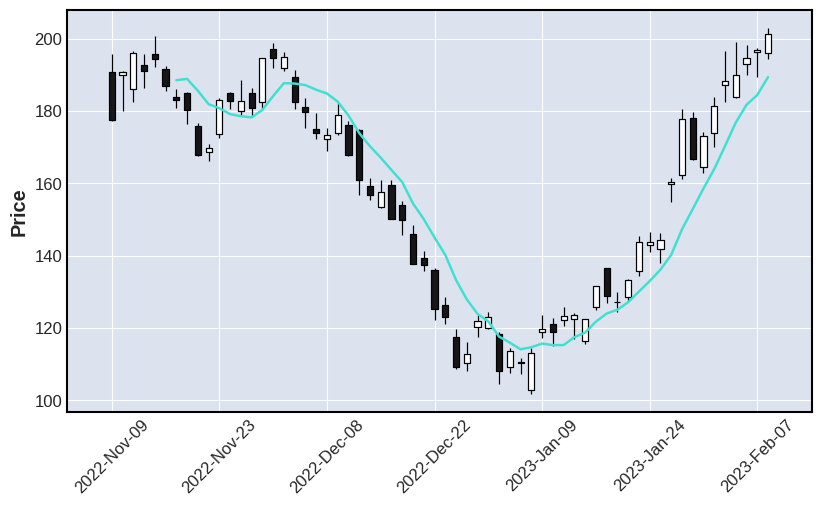

In [6]:
mpf.plot(history, type="candle", mav=(7),figratio=(18,10))

In [7]:
df = pd.read_csv("../data/quotes.csv")
df.shape

(100, 16)

In [8]:
df.head()

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment
0,CICHY,12.6400,2023/02/08,15:51 EST,0.050000,12.6340,12.6600,12.6100,21532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CICHF,0.6196,2023/02/06,13:09 EST,0.000000,0.6196,0.6196,0.6196,156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TXN,176.5000,2023/02/08,16:00 EST,-6.990005,181.7900,182.5900,176.4700,5657703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UPS,186.3600,2023/02/08,16:03 EST,-1.929993,186.7300,188.2000,186.0000,1880734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NFLX,366.8300,2023/02/08,16:00 EST,3.879974,360.0200,368.1930,358.3200,6253179,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tickers = sorted(df.iloc[:]["Symbol"].tolist())
tickers[:10]

['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AMZN', 'ASML', 'ASMLF', 'AVGO', 'AZN']

In [11]:
sample = tickers[:5]

In [13]:
for ticker in sample:
    print(yf.Ticker(ticker).info)

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': '', 'trailingPegRatio': 2.3123}
{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': '', 'trailingPegRatio': None}
{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': '', 'trailingPegRatio': None}
{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': '', 'trailingPegRatio': None}
{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': '', 'trailingPegRatio': 1.6459}


In [15]:
for ticker in sample:
    print(f"{ticker} highest price in 3 months: {yf.Ticker(ticker).history(period='3mo').High.max().astype(int)}")

AAPL highest price in 3 months: 157
ABBV highest price in 3 months: 166
ABT highest price in 3 months: 115
ACN highest price in 3 months: 303
ADBE highest price in 3 months: 402


In [16]:
ticks = df[["Symbol"]]
print(ticks.shape)
ticks.head()

(100, 1)


,Symbol
0,CICHY
1,CICHF
2,TXN
3,UPS
4,NFLX


In [17]:
ticks.to_csv("../data/ticks.csv")